# SVM
# Theoratical Part

SVM is a very powerful classification algorithm, we will solve a classification problem for iris flowers using SVM.

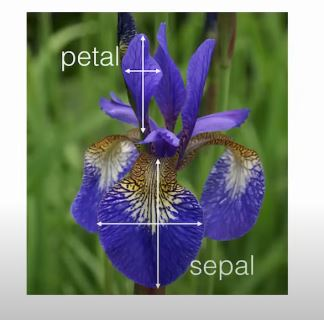

In the picture we see the petal width and height and the sepal width and height. Based on these 4 features we can determine the species of iris flowers like 3 different species. The iris dataset is avaialble in sklearn dataset module.

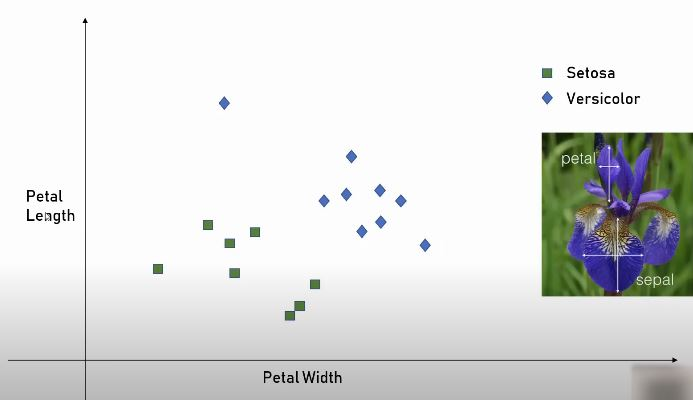

On this scatter plot we have 2 features petal length and width just to make things simple and based on that we can determine wether this species is setosa or Versicolor.

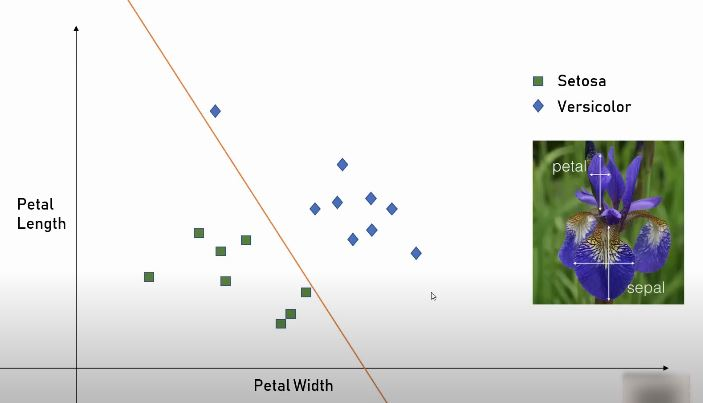

Now when we draw a classification boundary to separate these 2 groups we will notice that there are many possible ways of drawing these boundaries.

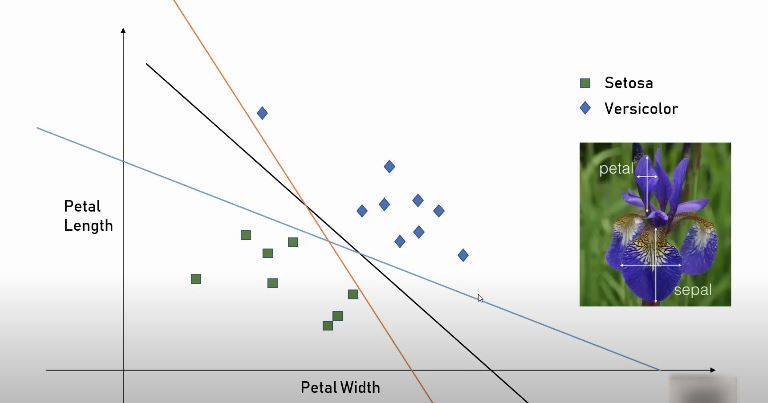

All these 3 are valid boundaries, so how do we decide that which boundary is best for my classfication problem.

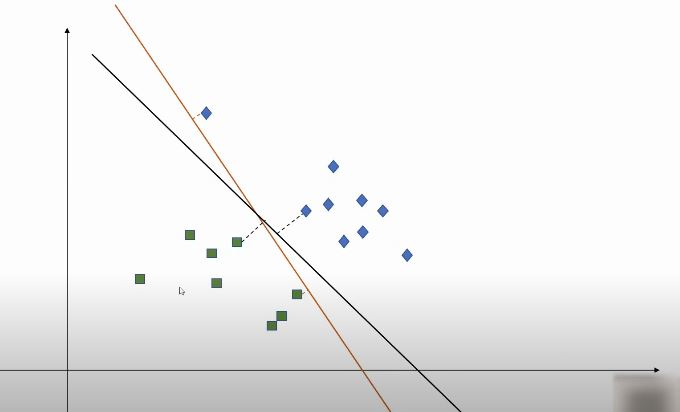

One way of looking at it is that we can tak nearby data points and we can measure the distance from that line to the datapoint as shown in figure.

So if we look at the top datapoint where the distance is smaller and in the middle the distance is higher which is called margins.

So which line is better, the one with lower or higher margin.

If we think carefully we will realize that the line with higher margin is better because it classifies 2  groups in middle in a better way for example at the top if we have datapoint in between the 2 lines then that line will probably missclassify.

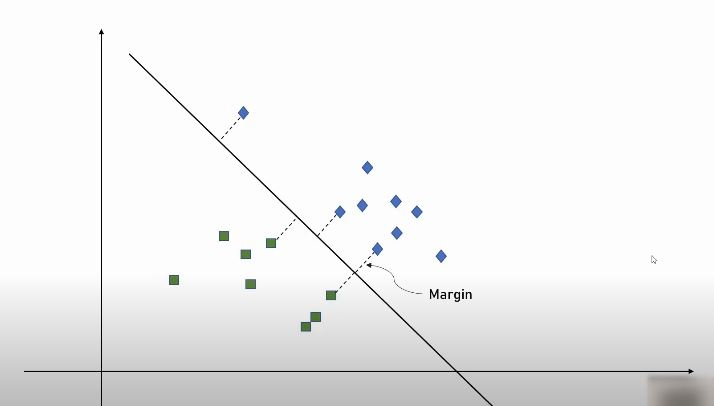

Thats what SVM tries to do so it will try to maximize this margin here between the nearby datapoints and the line itself and these nearbly lines are called support vectors as shown in figure:

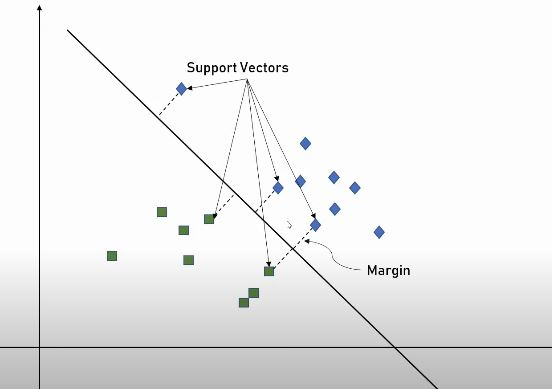

Hence the name is support vector machine.

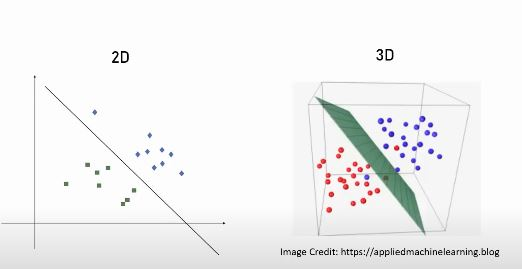

So in case of a 2D space where we have 2 features the boundary is a line and incase of 3D the boundary is a place and what will it be if we have n-dimensional space, usually we have n numbers of features. So theoratically and mathematically it is possible and it is called a hyperplane. So hyperplane is a plan in n-dimensinsional and dimension that tries to separate out different classification groups and that is what SVM algorithms try to do.

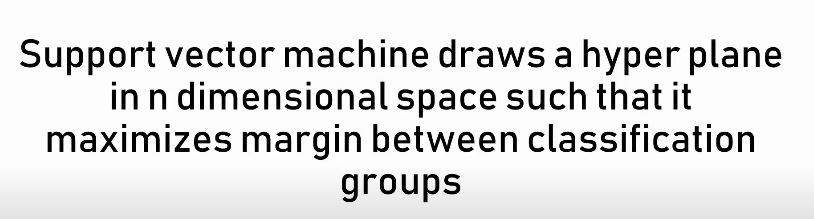.


# Gamma & Regularization

We need to familirize ourselves with certain technical terms such as  gamma and regularization.

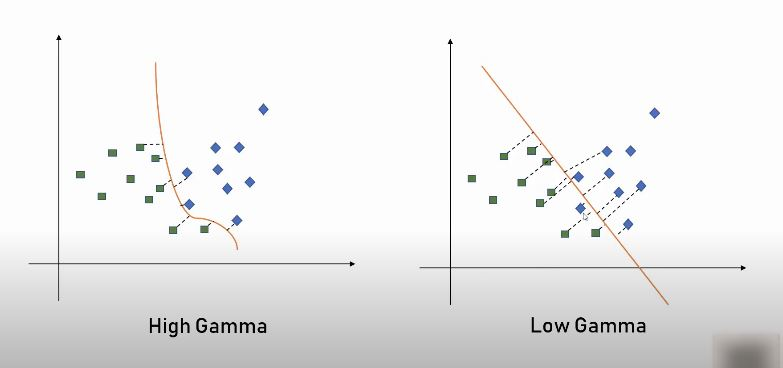

So on this graph we  can see that this decision boundary is only considering the datapoints which are very near to it so this is the one way of drawing a decision boundary. The 2nd approach of looking at the same problem could be that you consider the far away points as well so one the left hand side we have a high gamma and on left we have a low gamma and both the approaches are valid, it is just that with low gamma sometimes we might get problems with accuracy but that is ok because it might be computationally more efficient.

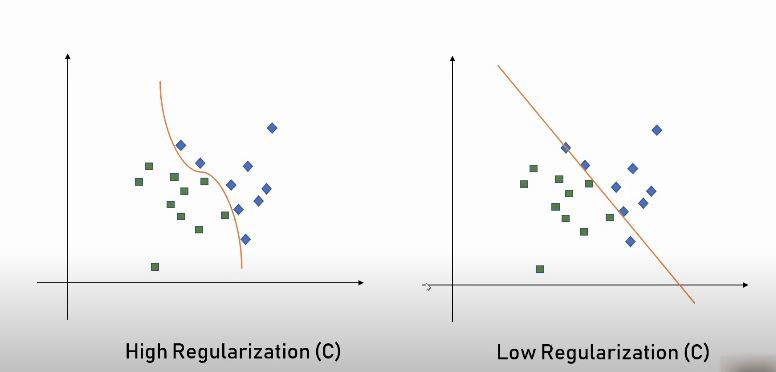

The other example is that we have a separate data set where we tried to draw our boundary very carefully to avoid any classification error and it might overfit the model. On the other hand we can take some errors and there are some classification errors which might be ok and our line look more smoother.

So on left hand side we have high regularizarion and on right we have low regularization.

We might have a complex dataset like this:

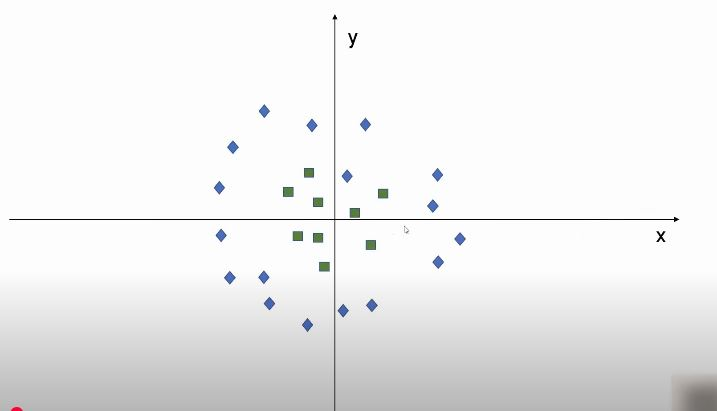

So what we would do because in the middle it is not very easy to draw a boundary. One approach is to create a 3rd dimension as we have x and y here.

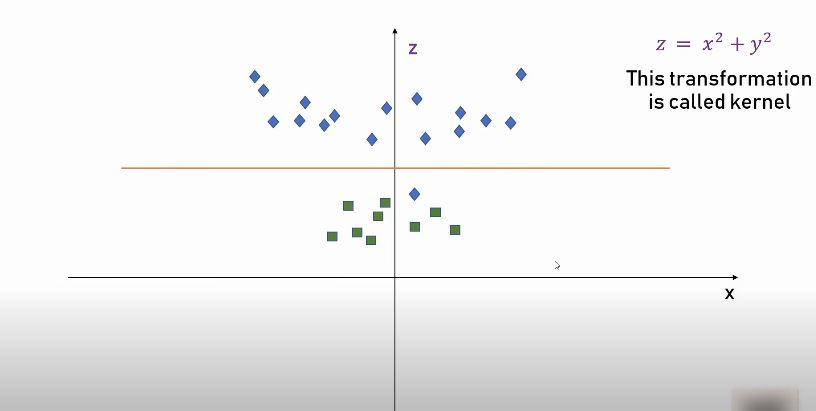

So what if we create a Z-dimension and the way we do it is by doing $z=x^2+y^2$, so we are doing some transformation on our basic features and creating this new feature and with that we will be able to draw this yellow decision boundary. So the y plane is perpendicular to our monitor right now that is why we are not able to see it. Once we have the boundary we can superimpose it on our y-plane, y and x the plane formed by x and y axis and we will get a boundary like this:

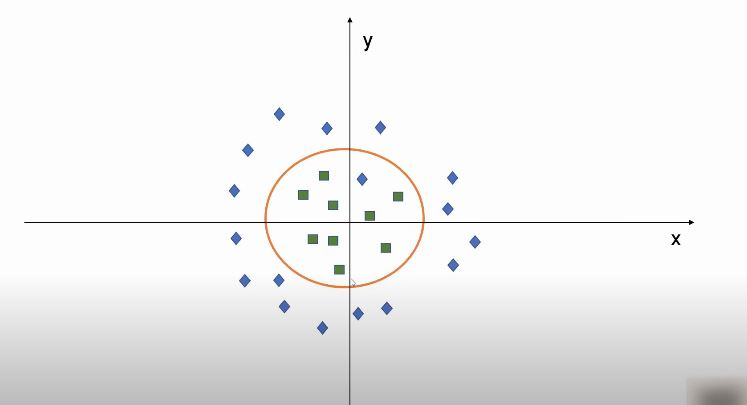.

So the z here is called a kernel by kernel what we mean is we are creating a transformation on our existing features so that we can draw a decision boundary easily.

# Coding part

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# possibel target values are 0 1 2, so what does it means?

iris.target_names

# so 0 means setosa, 1 means versicolor and 2 means virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
# exploring how many 0 or 1 in dataset

df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [16]:
# from one column we are creating another column with the help of apply function

df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [22]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


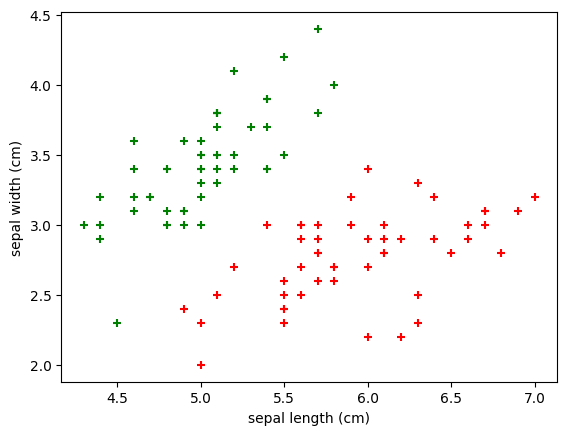

In [29]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')

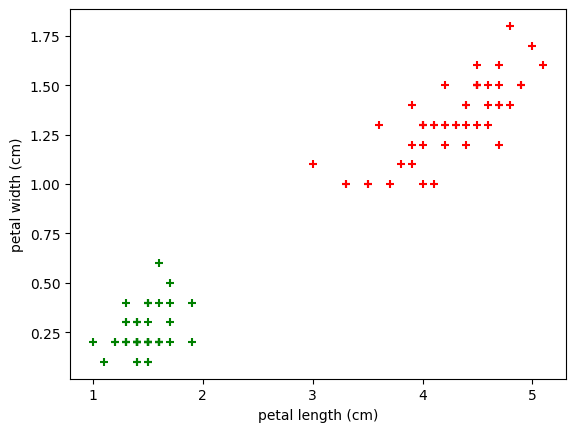

In [30]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')

In [64]:
from sklearn.model_selection import train_test_split

In [94]:
X = df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
len(X_train)

120

In [69]:
len(X_test)

30

In [111]:
from sklearn.svm import SVC

model = SVC(C=10)

In [112]:
model.fit(X_train,y_train)

SVC(C=10)

In [113]:
model.score(X_test,y_test)

1.0

In [114]:
model.score(X_train,y_train)

0.9916666666666667

In [93]:
model.predict([[6,3,5,2]])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])